In [1]:
import pandas as pd
import numpy as np
import fiona
from shapely.geometry import shape, Polygon, MultiPolygon, Point, MultiPoint, MultiLineString
import cPickle as pickle

In [2]:
pd.set_option('display.max_columns', 500)

In [3]:
ls

 Volume in drive C is OS
 Volume Serial Number is 2C57-DBDD

 Directory of C:\Users\andersrmr\Documents\Python Scripts\galvanize_prep\pothole_repair\sandbox

09/23/2015  10:51 PM    <DIR>          .
09/23/2015  10:51 PM    <DIR>          ..
09/23/2015  02:07 PM    <DIR>          .ipynb_checkpoints
09/23/2015  10:49 PM           520,602 all_potholes.pkl
09/18/2015  04:20 PM           335,717 bubble.png
09/16/2015  11:59 PM           220,561 chloropleth.png
09/22/2015  12:06 AM           183,495 city_potholes.pkl
09/23/2015  12:47 PM    <DIR>          data
09/21/2015  05:50 PM           216,553 df_1499to1999_cleaned.pkl
09/22/2015  11:44 AM           203,160 df_1999to2499_cleaned.pkl
09/21/2015  10:41 PM           893,024 df_1to1999_cleaned.pkl
09/22/2015  12:06 AM           971,726 df_1to1999_features.pkl
09/21/2015  11:50 PM           793,993 df_1to1999_geo_cleaned.pkl
09/23/2015  10:20 PM         1,094,412 df_1to2499_cleaned.pkl
09/23/2015  10:22 PM         1,285,691 df_1to2999_cleane

In [4]:
df = pd.read_pickle('df_1to6999_geo_cleaned.pkl')

In [5]:
df.head(2)

,OBJECTID,WOKEY,LOCATION,ADDRDESC,INITDT_dt,FLDSTARTDT_dt,FLDENDDT_dt,DURATION,DURATION_td,latitude,longitude,address
0,1,2456,Holden pl SW bt SW Kenyon Holden ...,HOLDEN PL SW BETWEEN SW HOLDEN ST AND SW KENYO...,2010-03-29 07:00:00,2010-04-06 07:00:00,2010-04-06 07:00:00,8 days,8,47.531858,-122.363186,"SW Kenyon St, Seattle, WA, USA"
1,2,2514,"NE Pacific Street, one block west of Montlake ...",MONTLAKE BLVD NE AND NE PACIFIC ST ...,2010-03-30 07:00:00,2010-04-01 07:00:00,2010-04-01 07:00:00,2 days,2,47.649014,-122.304655,"Montlake Blvd NE & NE Pacific St, Seattle, WA ..."


In [6]:
df.tail(2)

,OBJECTID,WOKEY,LOCATION,ADDRDESC,INITDT_dt,FLDSTARTDT_dt,FLDENDDT_dt,DURATION,DURATION_td,latitude,longitude,address
6992,6993,197859,: 2720 3RD AVE ...,CEDAR ST BETWEEN 3RD AVE AND 4TH AVE ...,2013-05-02 07:00:00,2013-05-08 07:00:00,2013-05-08 07:00:00,6 days,6,47.610800,-122.337217,"4th Ave, Seattle, WA, USA"
6993,6994,250779,7510 14th NE ...,14TH AVE NE BETWEEN NE 75TH ST AND NE 77TH ST ...,2014-01-25 08:00:00,2014-01-29 08:00:00,2014-02-13 08:00:00,19 days,19,47.684855,-122.294827,"NE 77th St, Seattle, WA 98115, USA"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4418 entries, 0 to 6993
Data columns (total 12 columns):
OBJECTID         4418 non-null int64
WOKEY            4418 non-null int64
LOCATION         4418 non-null object
ADDRDESC         4418 non-null object
INITDT_dt        4418 non-null datetime64[ns]
FLDSTARTDT_dt    4418 non-null datetime64[ns]
FLDENDDT_dt      4418 non-null datetime64[ns]
DURATION         4418 non-null timedelta64[ns]
DURATION_td      4418 non-null float64
latitude         4418 non-null float64
longitude        4418 non-null float64
address          4418 non-null object
dtypes: datetime64[ns](3), float64(3), int64(2), object(3), timedelta64[ns](1)
memory usage: 448.7+ KB


####Now I want to find the line geometry in the streetmap shapefile that is closest to each pothole geometry and featurize the information of that line for each pothole.

In [8]:
# Read in shapefile
shapefilename = 'data/WGS84/Street_Network_Database'
shp = fiona.open(shapefilename+'.shp')

In [9]:
# Get street segments and their indices
segs = [shape(seg['geometry']) for seg in shp]
#shp.close()

In [10]:
type(segs)

list

In [11]:
len(segs)

33913

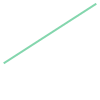

In [12]:
segs[0]

In [13]:
print segs[0]

LINESTRING (-122.308826734 47.49780621700006, -122.3091893 47.49757283900004)


In [14]:
print segs[7]

LINESTRING (-122.348866677 47.49206465800006, -122.349902932 47.49204838900005, -122.349965621 47.49204733800008)


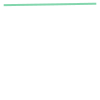

In [15]:
segs[7]

In [16]:
shp.schema

{'geometry': 'LineString',
 'properties': OrderedDict([(u'F_INTR_ID', 'int:9'), (u'T_INTR_ID', 'int:9'), (u'SND_ID', 'int:9'), (u'SND_FEACOD', 'int:9'), (u'CITYCODE', 'int:9'), (u'STNAME_ID', 'int:9'), (u'ST_CODE', 'int:9'), (u'ARTERIAL_C', 'int:9'), (u'SEGMENT_TY', 'int:9'), (u'AGENCY_COD', 'int:9'), (u'ACCESS_COD', 'int:9'), (u'DIVIDED_CO', 'int:9'), (u'STRUCTURE_', 'int:9'), (u'LEGALLOC_C', 'int:9'), (u'VEHICLE_US', 'int:9'), (u'GIS_SEG_LE', 'float:19.11'), (u'L_ADRS_FRO', 'int:9'), (u'L_ADRS_TO', 'int:9'), (u'R_ADRS_FRO', 'int:9'), (u'R_ADRS_TO', 'int:9'), (u'ORD_PRE_DI', 'str:2'), (u'ORD_STREET', 'str:20'), (u'ORD_STRE_1', 'str:4'), (u'ORD_SUF_DI', 'str:2'), (u'ORD_STNAME', 'str:31'), (u'L_CITY', 'str:20'), (u'L_STATE', 'str:2'), (u'L_ZIP', 'str:5'), (u'R_CITY', 'str:20'), (u'R_STATE', 'str:2'), (u'R_ZIP', 'str:5'), (u'SNDSEG_UPD', 'date'), (u'COMPKEY', 'int:9'), (u'COMPTYPE', 'int:9'), (u'UNITID', 'str:16'), (u'UNITID2', 'str:16'), (u'SHAPE_Leng', 'float:19.11')])}

Are the linestrings "standalone", or do I need to link them together, like I used MultiPolygon to link together the block group polygons?  Would MultiLineString do that?

In [17]:
print segs[7]

LINESTRING (-122.348866677 47.49206465800006, -122.349902932 47.49204838900005, -122.349965621 47.49204733800008)


In [18]:
msegs = MultiLineString(segs)

In [19]:
type(msegs)

shapely.geometry.multilinestring.MultiLineString

In [20]:
# Associate each linestring with a list of the desired features
# street_feature_tup = []
idx = 0
for feature in shp:
    print msegs[idx]
#     print segs[idx]
    idx += 1
    if idx == 10:
        break
#     print feature['properties']['GEOID']

LINESTRING (-122.308826734 47.49780621700006, -122.3091893 47.49757283900004)
LINESTRING (-122.312544808 47.48675669800008, -122.313017658 47.48586029900008)
LINESTRING (-122.314404433 47.47963375800003, -122.3147574289999 47.47774685000007)
LINESTRING (-122.313750409 47.48314825100005, -122.314084206 47.48134536900005)
LINESTRING (-122.345808814 47.49211262200004, -122.348123865 47.49207631700006)
LINESTRING (-122.348885266 47.49285460300007, -122.348866677 47.49206465800006)
LINESTRING (-122.348123865 47.49207631700006, -122.348866677 47.49206465800006)
LINESTRING (-122.348866677 47.49206465800006, -122.349902932 47.49204838900005, -122.349965621 47.49204733800008)
LINESTRING (-122.307439424 47.49934315400003, -122.306882441 47.49933886600007, -122.3067667559999 47.49932199700004)
LINESTRING (-122.304640944 47.49934098600005, -122.3026078029999 47.49933489900008, -122.302512829 47.49934902900003, -122.302419831 47.49936826400005, -122.3023294019999 47.49939247700007, -122.302242118 4

It takes a while to build each of the multilinestrings, while just going with the linestrings themselves is instant, obviously, since there is no function call.  Does it make a difference?  Only testing will tell.  First, try without multilinestring.

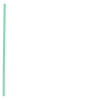

In [21]:
msegs[10000]

In [22]:
# Associate each linestring with a list of the desired features
# **Change to street_feature_tup**

#I could use a Polygon constructor on a linestring element

street_feature_list = []
# idx = 0
for feature in shp:
    feature_list = [feature['properties']['SND_FEACOD']]
    feature_list.append(feature['properties']['ST_CODE'])
    feature_list.append(feature['properties']['SEGMENT_TY'])
    feature_list.append(feature['properties']['DIVIDED_CO'])
    feature_list.append(feature['properties']['VEHICLE_US'])
    street_feature_list.append(feature_list)
#     street_feature_tup.append((segs[idx], feature_list))
#     print street_feature_tup[idx], idx
#     idx += 1
#     if idx == 10:
#         break

I have to do this differently: Create the multistring on the fly and call a small helper function to get the features.

In [23]:
len(street_feature_list)

33913

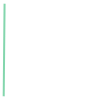

In [24]:
msegs[500]

In [25]:
street_feature_list[500]

[1, 0, 1, 1, 1]

In [26]:
def get_line_features(feature):
    feature_list = []
    feature_list = [feature['properties']['SND_FEACOD']]
    feature_list.append(feature['properties']['ST_CODE'])
    feature_list.append(feature['properties']['SEGMENT_TY'])
    feature_list.append(feature['properties']['DIVIDED_CO'])
    feature_list.append(feature['properties']['VEHICLE_US'])
    return feature_list

In [46]:
# shp.close()

In [28]:
with open('all_potholes.pkl') as f:
        all_potholes = pickle.load(f)


In [29]:
len(msegs)

33913

In [30]:
len(all_potholes[0])

4418

In [32]:
# Compute closest distance from pothole to street geom;
# Associate the street geom features with the closest pothole
street_features = []
idx = 0
for hole in xrange(len(all_potholes[0])):
    if idx == 5:
        break
    idx += 1
    found = False
    smallest_dist = 100.
    for street in xrange(len(msegs)):
        dist = all_potholes[0][hole].distance(msegs[street])
        if dist < smallest_dist:
            found = True
            smallest_dist = dist
            smallest_dist_street_feature = street_feature_list[street]
            look_at_street = msegs[street]
    street_features.append(smallest_dist_street_feature)
    print hole, smallest_dist_street_feature, look_at_street, smallest_dist
    if not found:   
        street_features.append([])

0 [1, 0, 1, 1, 1] LINESTRING (-122.362891975 47.53187698800008, -122.363206979 47.53187733100003) 1.9507818301e-05
1 [5, 0, 1, 1, 1] LINESTRING (-122.305972012 47.64970388300003, -122.305150593 47.64928674500004, -122.304591259 47.64899740500005) 1.49051117941e-05
2 [5, 0, 1, 1, 1] LINESTRING (-122.301631466 47.70670120200003, -122.301626761 47.70680835000007, -122.3016197329999 47.70692463800003, -122.3016107939999 47.70704086500007, -122.301599941 47.70715701700004, -122.301587174 47.70727308100004, -122.301572495 47.70738904200005, -122.3015559089999 47.70750488400006, -122.301537413 47.70762059800006, -122.301517016 47.70773616400004, -122.301494712 47.70785156900007, -122.301470511 47.70796679900008, -122.301444415 47.70808184100008, -122.301416424 47.70819668100006, -122.301386543 47.70831130500005, -122.3013699749999 47.70837095800005, -122.301354772 47.70842569400003) 1.95450569415e-06
3 [1, 0, 1, 1, 1] LINESTRING (-122.325062041 47.59751297700007, -122.325065332 47.59667434800

This entire job would take about 1 hr 45 min to complete.  Can I do it on an EC2 instance instead?

In [33]:
street_features

[[1, 0, 1, 1, 1],
 [5, 0, 1, 1, 1],
 [5, 0, 1, 1, 1],
 [1, 0, 1, 1, 1],
 [5, 0, 1, 1, 1]]

In [34]:
shp.close()

In [36]:
for elem in street_features:
    print elem[0]

1
5
5
1
5


In [38]:
[elem[1] for elem in street_features]

[0, 0, 0, 0, 0]

In [41]:
# Add street geom features to dataframe
df['SND_FEACOD'] = pd.Series([elem[0] for elem in street_features], index = all_potholes[1])
df['ST_CODE'] = pd.Series([elem[1] for elem in street_features], index = all_potholes[1])
df['SEGMENT_TY'] = pd.Series([elem[2] for elem in street_features], index = all_potholes[1])
df['DIVIDED_CO'] = pd.Series([elem[3] for elem in street_features], index = all_potholes[1])
df['VEHICLE_US'] = pd.Series([elem[4] for elem in street_features], index = all_potholes[1])

ValueError: Wrong number of items passed 5, placement implies 4418